<a href="https://colab.research.google.com/github/yogithamekala/TRIANGLE-MODEL/blob/main/Handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Load the dataset from the uploaded file in the Colab filesystem
# For example, if the file is 'Employee_Attrition.csv' in the upload section
data = pd.read_csv('/content/Employee_Attrition.csv')

# Display the first few rows to confirm it's loaded
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Convert 'Attrition' to binary (1 for 'Yes', 0 for 'No')
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Separate features (X) and target (y)
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1176, 47), (294, 47), (1176,), (294,))

In [8]:
# Ensure all the features (X_train and X_test) are in float32 format
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Ensure the target (y_train and y_test) are in integer format
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Build a Sequential Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Use Input layer explicitly
model = Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))  # Define the input shape
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)



Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7460 - loss: 220.1430 - val_accuracy: 0.6633 - val_loss: 22.9907
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 26.7718 - val_accuracy: 0.7551 - val_loss: 6.0454
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7365 - loss: 12.4690 - val_accuracy: 0.8605 - val_loss: 11.5578
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7314 - loss: 19.1284 - val_accuracy: 0.6939 - val_loss: 6.5458
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7290 - loss: 7.9122 - val_accuracy: 0.8231 - val_loss: 4.2000
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7389 - loss: 8.0160 - val_accuracy: 0.8537 - val_loss: 6.2932
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7643 - loss: 7.2431 - val_accuracy: 0.8503 - val_loss: 8.6576
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7208 - loss: 8.2724 - val_accuracy: 0.8231 - va

In [9]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6622 - loss: 9.0059  
Test Accuracy: 0.6939


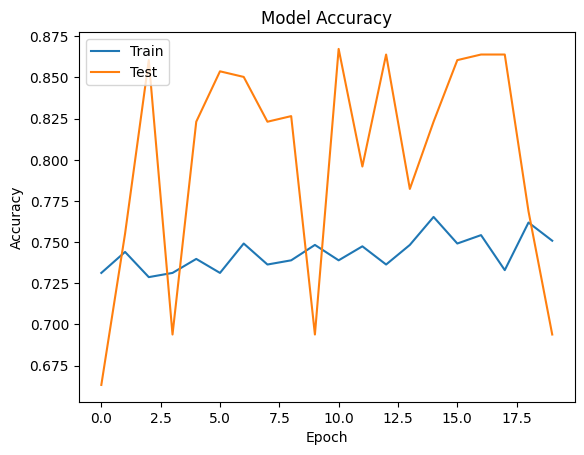

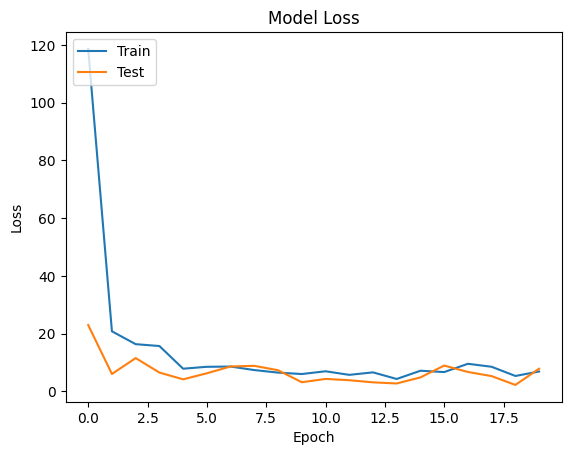

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [11]:
# Save the model
model.save('employee_attrition_model.h5')

# Use Git commands to push it to GitHub or deploy with Streamlit


In [12]:
import sqlite3

# Connect to SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect('example.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Create a table for storing predictions
cursor.execute('''
    CREATE TABLE IF NOT EXISTS predictions (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        result REAL
    )
''')

# Commit the changes
conn.commit()

# Function to insert a prediction into the database
def insert_prediction(prediction):
    cursor.execute("INSERT INTO predictions (result) VALUES (?)", (prediction,))
    conn.commit()

# Function to query all predictions
def get_all_predictions():
    cursor.execute("SELECT * FROM predictions")
    return cursor.fetchall()

# Example: Insert a prediction
insert_prediction(0.85)

# Fetch all predictions
predictions = get_all_predictions()
print(predictions)

# Close the connection
conn.close()


[(1, 0.85)]


In [13]:
pip install Flask torch


In [24]:
!pip install firebase-admin

In [39]:
import firebase_admin
from firebase_admin import credentials, firestore

# Initialize Firebase only if not already initialized
if not firebase_admin._apps:
    cred = credentials.Certificate('/content/reproducibility-bdb4e-firebase-adminsdk-fa2v9-7102e058ef.json')
    firebase_admin.initialize_app(cred)

# Get Firestore client
db = firestore.client()

def add_user():
    try:
        # Add a document to the 'users' collection
        result = db.collection('users').add({
            'name': 'John Doe',
            'age': 29
        })

        # Unpack the result tuple
        timestamp, doc_ref = result

        # Print the document ID
        print(f'Document written with ID: {doc_ref.id}')

    except Exception as e:
        print(f"Error adding document: {e}")

# Call the function
add_user()


Document written with ID: OjBduRLv4xW066IYqvzp


In [40]:
pip install --upgrade firebase-admin


**Model Deployment**

In [41]:
import torch
import torch.nn as nn

# Define a simple model (replace this with your actual model)
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc(x)

# Load or initialize model
model = SimpleModel()
# (Optional) Save the model
torch.save(model, 'simple_model.pth')


Create a Flask app in Colab to serve the model


In [44]:
!pip install flask

from flask import Flask, request, jsonify
import torch
import sqlite3

app = Flask(__name__)

# Load pre-trained model
model = torch.load('simple_model.pth')
model.eval()

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    inputs = torch.tensor([data['input']], dtype=torch.float32)
    prediction = model(inputs).item()

    # Save prediction to SQLite
    conn = sqlite3.connect('example.db')
    cursor = conn.cursor()
    cursor.execute("INSERT INTO predictions (result) VALUES (?)", (prediction,))
    conn.commit()
    conn.close()

    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


<ipython-input-44-4e310ca6f196>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('simple_model.pth')
INFO:werkzeug:WARNING: This is a development server.

**Frontend Development**